<pre/>
<pre/>
# Network Analysis for Diffusion with netdiffuseR
<pre/>
<pre/>
## The case of Twitter-Hashtags-like 2-Mode Networks
<pre/>


<pre/>
## by Moses Boudourides & Stergios Lenis

In [17]:
library(rPython)

In [18]:
python.load("2ModeTwitterNetworkGenerator.py")

In [19]:
library(netdiffuseR)
# rm(list=ls())
library(Matrix) # For coercing into sparse matrix format
library(stringr) # For (nice) text processing

### Parsing data generated by Python

In [20]:
# This part is for parsing the array
readPyArray <- function(x, as_dgCMatrix=TRUE) {
  # Importing data into R
  dat <- readLines(x)

  # Finding the boudaries of each adjmat
  index <- matrix(which(grepl("^(\\[[0-9]+|\\])$", dat)), ncol=2, byrow = TRUE)

  # Empty list to be filled
  graph <- vector("list", nrow(index))
  for (i in 1:nrow(index)) {

    # Subsetting matrix
    tmp <- index[i, ,drop=TRUE]
    tmp <- dat[(tmp[1] + 1):(tmp[2]-1)]

    # Cleaning and coercing into rows
    tmp <- stringr::str_replace_all(tmp, "\\[|\\]", "")
    tmp <- lapply(tmp, function(x) as.numeric(strsplit(x, ",")[[1]]))

    # Coercing into a matrix
    graph[[i]] <- do.call(rbind, tmp)

    if (as_dgCMatrix)
      graph[[i]] <- methods::as(graph[[i]], "dgCMatrix")
  }

  # Naming the adjmats
  names(graph) <- gsub("^\\[", "", dat[index[,1]])
  message("The file ", x," has been processed sussecsfully.")
  graph
}

# Reading data into R
graph <- readPyArray("List_of_Graphs1.txt")
toa <- readLines("toa1.txt")
toa <- as.numeric(strsplit(stringr::str_replace_all(toa, "\\[|\\]", ""), ",")[[1]])

# Checking size of the slices
str(lapply(graph, dim))

# Truncating the range of toa (so it fits the data!)
# toa[which(toa == max(toa, na.rm = TRUE))] <- 11

The file List_of_Graphs1.txt has been processed sussecsfully.
Warning message:
In readLines("toa1.txt"): incomplete final line found on 'toa1.txt'Warning message:
In eval(expr, envir, enclos): NAs introduced by coercion

List of 12
 $ 0 : int [1:2] 20 20
 $ 1 : int [1:2] 20 20
 $ 2 : int [1:2] 20 20
 $ 3 : int [1:2] 20 20
 $ 4 : int [1:2] 20 20
 $ 5 : int [1:2] 20 20
 $ 6 : int [1:2] 20 20
 $ 7 : int [1:2] 20 20
 $ 8 : int [1:2] 20 20
 $ 9 : int [1:2] 20 20
 $ 10: int [1:2] 20 20
 $ 11: int [1:2] 20 20


### Creating the netdiffuseR object

In [21]:
diffnet <- as_diffnet(graph, toa)
diffnet

Warning message:
In as_diffnet(graph, toa): Coercing -toa- into integer.

ERROR: Error in as_diffnet(graph, toa): Range of -toa- is smaller than the number of slices in -graph- (11 and 12 respectively). Please provide lower and upper boundaries for the values in -toa- using -t0- and -t- (see ?toa_mat).


Dynamic network of class -diffnet-
 # of nodes        : 20
 # of time periods : 12
 Adoption rate     : 0.95
 Type              : directed

In [22]:
summary(diffnet)

Diffusion network summary statistics
-----------------------------------------------------------------------
 Period  Adopters Cum Adopt. Cum Adopt. % Hazard Rate Density Moran's I 
-------- -------- ---------- ------------ ----------- ------- --------- 
       0       11         11         0.55           -    0.63     -0.11 
       1        0         11         0.55        0.00    0.55     -0.06 
       2        0         11         0.55        0.00    0.57     -0.07 
       3        2         13         0.65        0.22    0.55     -0.10 
       4        0         13         0.65        0.00    0.55     -0.07 
       5        2         15         0.75        0.29    0.63     -0.10 
       6        0         15         0.75        0.00    0.60     -0.09 
       7        1         16         0.80        0.20    0.55     -0.09 
       8        2         18         0.90        0.50    0.57     -0.07 
       9        0         18         0.90        0.00    0.62     -0.05 
      10       

### Some nice plotting methods

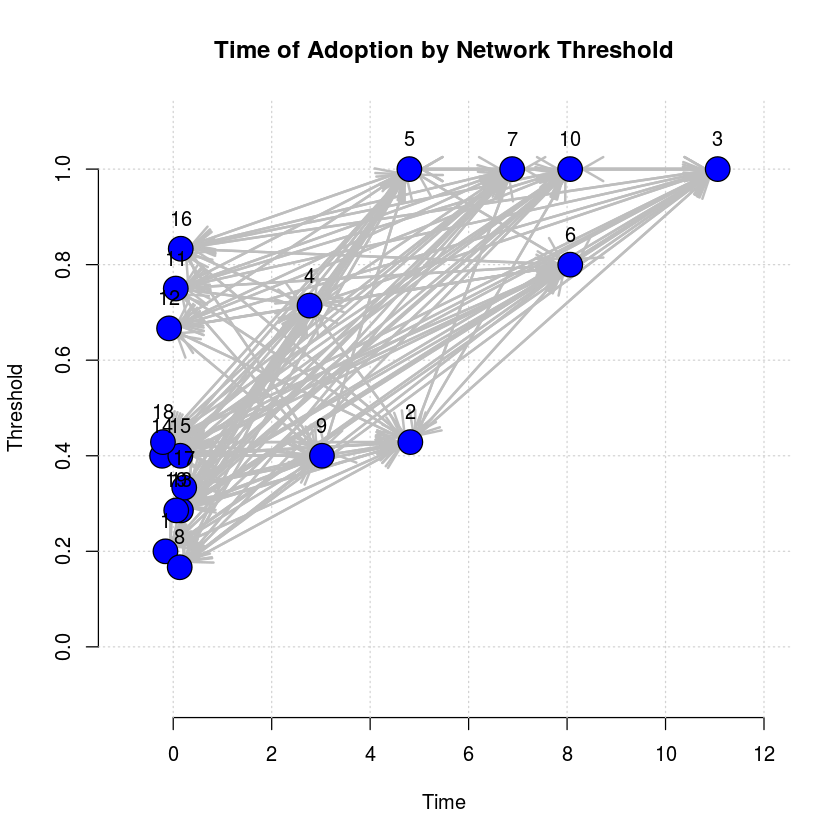

In [23]:
plot_threshold(diffnet, vertex.cex = 1/4)

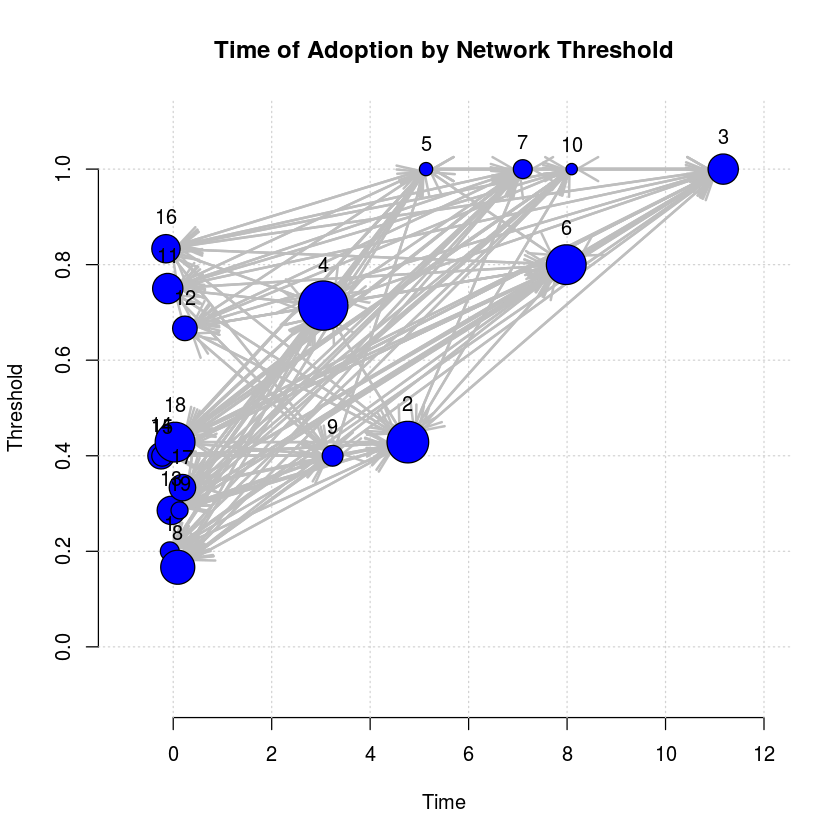

In [24]:
# Threshold with vertex size = avg degree
cex <- rowMeans(dgr(diffnet))
cex <- (cex - min(cex) + 1)/(max(cex) - min(cex) + 1)/2
plot_threshold(diffnet, vertex.cex = cex)

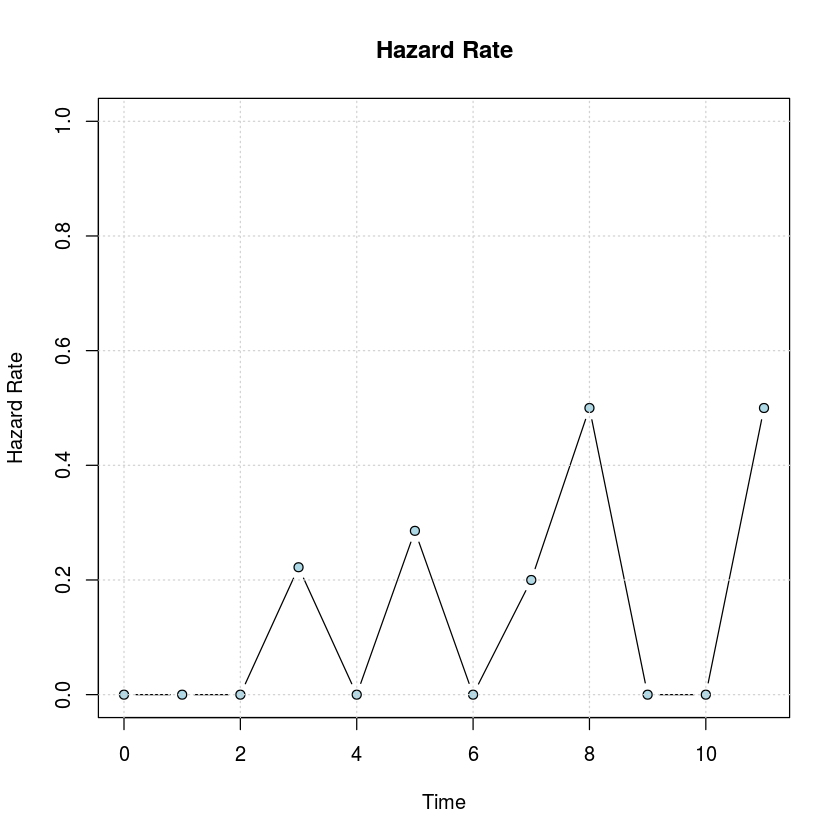

In [25]:
plot_hazard(diffnet)

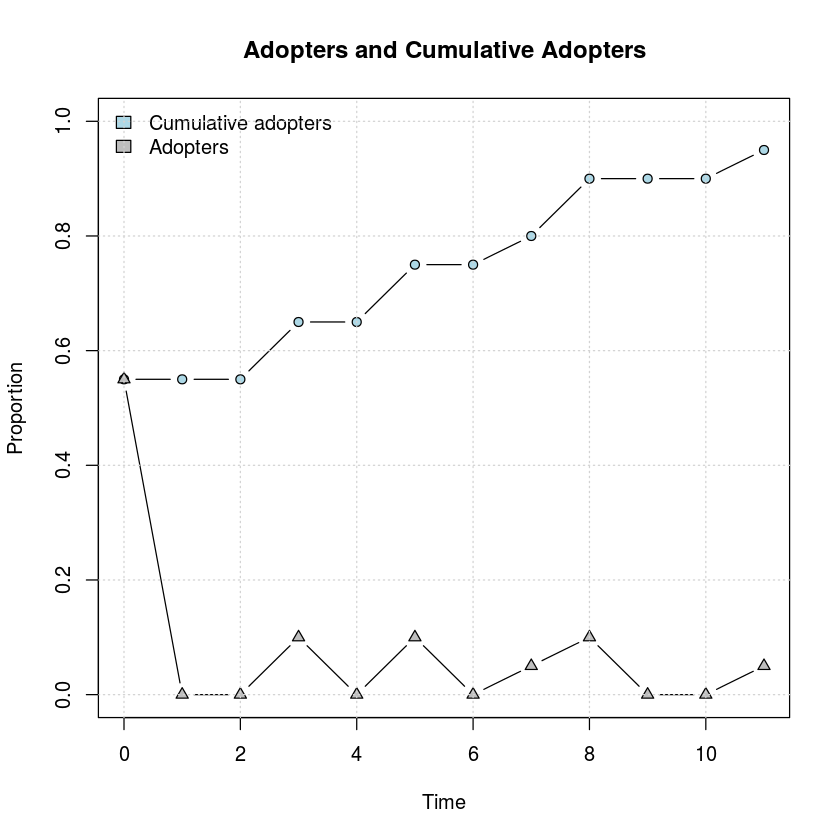

In [26]:
plot_adopters(diffnet)

### Diffusion process

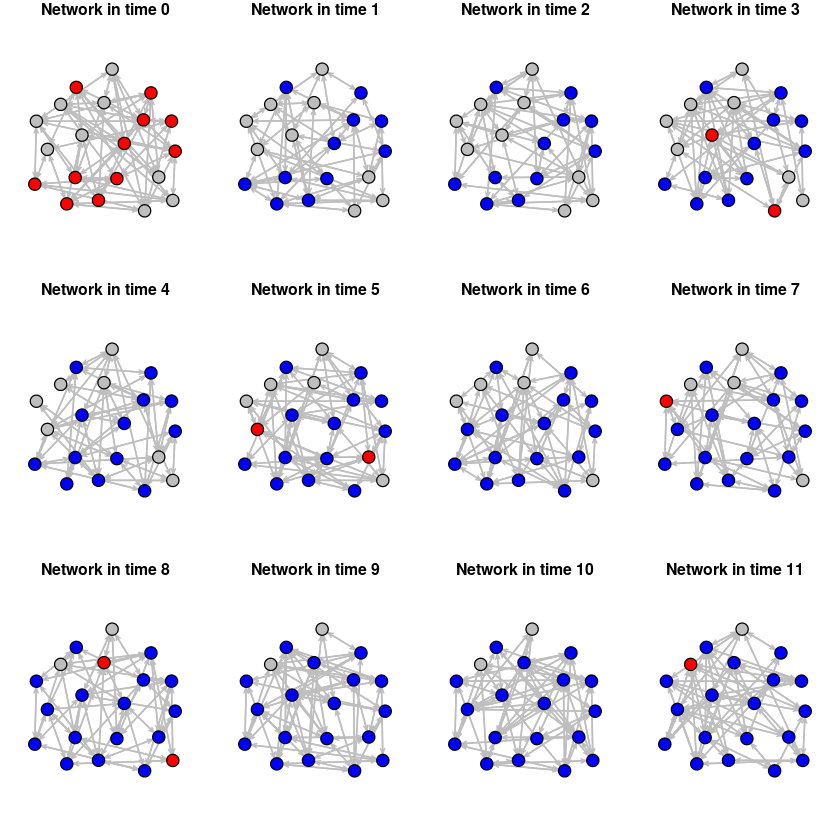

In [27]:
# plot_diffnet(diffnet, vertex.cex = 1, slices=c(1,4,8,12))
plot_diffnet(diffnet, vertex.cex = 2)

### Infectiousness and Susceptibility

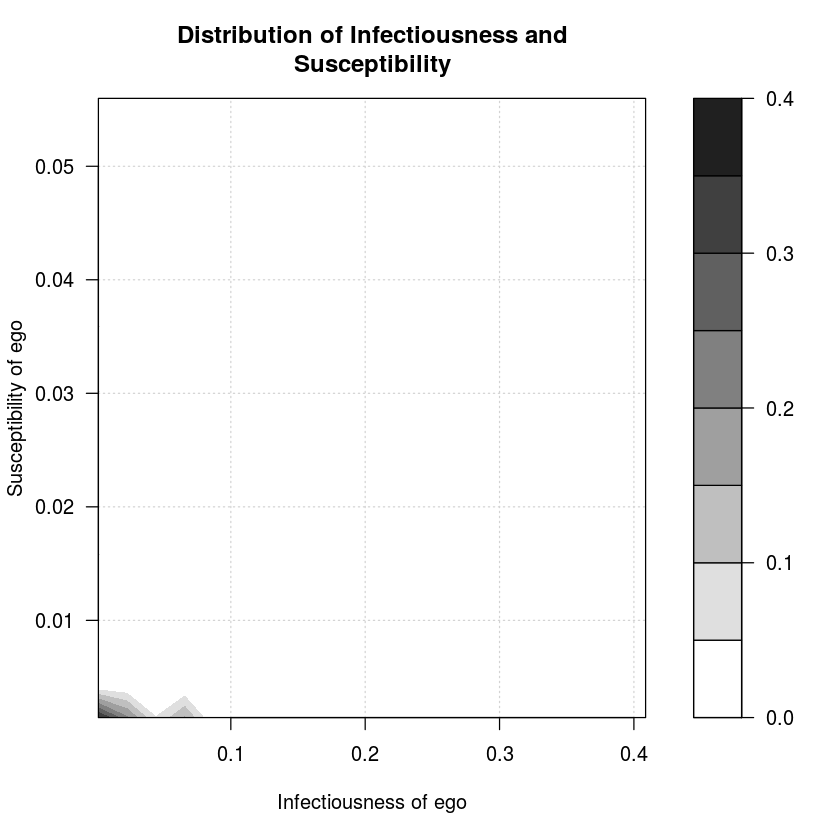

In [28]:
dat <- plot_infectsuscep(diffnet, logscale = FALSE, bins = 20, K=4)

In [29]:
with(dat, cor.test(infect, suscept))


	Pearson's product-moment correlation

data:  infect and suscept
t = 3.3902, df = 17, p-value = 0.00348
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2542604 0.8454397
sample estimates:
      cor 
0.6351211 


### Threshold

In [30]:
summary(threshold(diffnet))

   threshold     
 Min.   :0.1667  
 1st Qu.:0.3667  
 Median :0.4286  
 Mean   :0.5838  
 3rd Qu.:0.8167  
 Max.   :1.0000  
 NA's   :1       